<a href="https://colab.research.google.com/github/antonio-ledesma28/CYPAntonioLB/blob/master/Clasificador_Bayesiano_Ingenuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
#PROYECTO FINAL
"""Clasificador Bayesiano Ingenuo"""
#Ledesma Briones Antonio Yamir
#Reyes Márquez Josseline Esmeralda

import pandas as pd
Tabla = pd.read_csv("bebidas.csv", index_col = 0)
Tabla

,Edad,Temperatura,Bebida
0,17,13,0
1,4,15,0
2,44,11,1
3,37,14,0
4,37,25,1
...,...,...,...
995,17,17,0
996,57,12,1
997,82,5,1
998,61,5,1


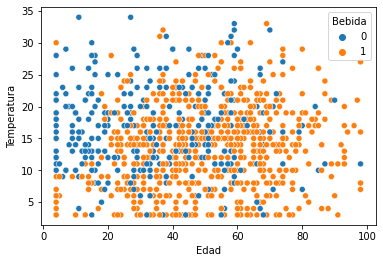

In [144]:
import seaborn as sns
sns.scatterplot(x=Tabla.Edad,y=Tabla.Temperatura,hue=Tabla.Bebida)

In [145]:
# Número de observaciones
n=1000

# Categorización de edades en:
# 0 Menores de edad (si la persona tiene menos de 18 años)
# 1 Adultos (a partir de 18 años hasta antes de los 60 cumplidos)
# 2 Adultos mayores (de 60 años en adelante)


for i in range(0,n):
    if(Tabla.Edad[i]<18):
        Tabla.Edad[i]=0
    elif(Tabla.Edad[i]>=18) & (Tabla.Edad[i]<60):
        Tabla.Edad[i] = 1
    else:
        Tabla.Edad[i]=2

Tabla

,Edad,Temperatura,Bebida
0,0,13,0
1,0,15,0
2,1,11,1
3,1,14,0
4,1,25,1
...,...,...,...
995,0,17,0
996,1,12,1
997,2,5,1
998,2,5,1


In [146]:
#Categorización de temperatura en:
#0 Frío (10°C hacia abajo)
#1 Templado (entre 10°C y 20°C)
#2 Cálido (20°C hacia arriba)

for i in range(0,n):
    if(Tabla.Temperatura[i]<=10):
        Tabla.Temperatura[i]=0
    elif(Tabla.Temperatura[i]>10) & (Tabla.Temperatura[i]<20):
        Tabla.Temperatura[i] = 1
    else:
        Tabla.Temperatura[i] = 2

Tabla

,Edad,Temperatura,Bebida
0,0,1,0
1,0,1,0
2,1,1,1
3,1,1,0
4,1,2,1
...,...,...,...
995,0,1,0
996,1,1,1
997,2,0,1
998,2,0,1


In [147]:
#Cálculo de la distribución Z
#La distribución se almacena en una lista, donde la posición 0 corresponde a P(Z=Fría) y la posición 1 a P(Z=Caliente)
#Recordar que estamos representando fría con 0 y caliente con 1
#Inicio del conteo en cero
PrioriZ=[0,0]

for i in range(0,n):
    PrioriZ[Tabla.Bebida[i]]+=1

#Muestra el conteo de cuántas bebidas de cada tipo hay
print("Número de bebidas según su tipo: ",PrioriZ)

#Divide entre el número de clientes para obtener la distribución de probabilidad
for i in range(0,2):
    PrioriZ[i]/=n

print("Distribución de probabilidad de Z: ",PrioriZ)

Número de bebidas según su tipo:  [339, 661]
Distribución de probabilidad de Z:  [0.339, 0.661]


In [148]:
#Cálculo de la distribución conjunta de X y Y 
#La distribución se almacena en una lista de listas (tamaño 3X3)
#El primer índice corresponde a la edad X (0 para menor de edad, 1 para adulto, 2 para adulto mayor)
#El segundo índice corresponde a la temperatura del día y (0 para frío,1 para templado, 2 para cálido)

EvidenciaXY =[[0,0,0],[0,0,0],[0,0,0]]

for i in range(0,n):
    EvidenciaXY[Tabla.Edad[i]][Tabla.Temperatura[i]]+=1

#Muestra el conteo para cada pareja de valores edad-temperatura
print("Número de compras agrupadas según edad y temperatura: ", EvidenciaXY)

#Divide entre el número de clientes para obtener la distribución de probabilidad
for i in range(0,3):
    for j in range(0,3):
        EvidenciaXY[i][j]/=n
        
print("Distribución de probabilidad conjunta de X y Y: ",EvidenciaXY)

Número de compras agrupadas según edad y temperatura:  [[36, 50, 28], [178, 309, 126], [77, 133, 63]]
Distribución de probabilidad conjunta de X y Y:  [[0.036, 0.05, 0.028], [0.178, 0.309, 0.126], [0.077, 0.133, 0.063]]


In [149]:
#Cálculo de la distribución conjunta de X Y y Z 
#La distribución se almacena en una lista de listas (tamaño 2X9)

EvidenciaXYZ =[[[0,0], [0,0], [0,0]],[[0,0], [0,0], [0,0]],[[0,0], [0,0], [0,0]]]

for i in range(0,1000):
    EvidenciaXYZ[Tabla.Edad[i]][Tabla.Temperatura[i]][Tabla.Bebida[i]] += 1

for i in range(0,3):
    for j in range(0,3):
        EvidenciaXYZ[i][j][0] /= 1000
        EvidenciaXYZ[i][j][1] /= 1000

IXYZ = EvidenciaXYZ #Intersección XYC

EvidenciaXYZ = str(EvidenciaXYZ)
EvidenciaXYZ = EvidenciaXYZ.replace('[','')
EvidenciaXYZ = EvidenciaXYZ.replace(']','')
EvidenciaXYZ = EvidenciaXYZ.split(', ')

IXYZ

[[[0.016, 0.02], [0.047, 0.003], [0.027, 0.001]],
 [[0.043, 0.135], [0.11, 0.199], [0.061, 0.065]],
 [[0.008, 0.069], [0.014, 0.119], [0.013, 0.05]]]

In [150]:
for i in range(0, 3):
    for j in range(0, 3):
        IXYZ[i][j][0] /= PrioriZ[0]
        IXYZ[i][j][1] /= PrioriZ[1]

IXYZ #Verisisimilitud

[[[0.0471976401179941, 0.030257186081694403],
  [0.13864306784660765, 0.0045385779122541605],
  [0.07964601769911504, 0.0015128593040847202]],
 [[0.12684365781710913, 0.2042360060514372],
  [0.3244837758112094, 0.3010590015128593],
  [0.1799410029498525, 0.09833585476550681]],
 [[0.02359882005899705, 0.1043872919818457],
  [0.04129793510324484, 0.18003025718608168],
  [0.0383480825958702, 0.07564296520423601]]]

In [151]:
Campos = {'X=x':['Menor', 'Menor', 'Menor','Menor', 'Menor', 'Menor', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Mayor', 'Mayor', 'Mayor', 'Mayor', 'Mayor', 'Mayor'],
          'Y=y':['Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido', 'Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido', 'Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido'],
          'Z=z':['Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente'],
          'P(X=x Int Y=y Int Z=z)':EvidenciaXYZ}
DistribucionXYZ = pd.DataFrame(Campos)
DistribucionXYZ

,X=x,Y=y,Z=z,P(X=x Int Y=y Int Z=z)
0,Menor,Frío,Fría,0.016
1,Menor,Frío,Caliente,0.02
2,Menor,Templado,Fría,0.047
3,Menor,Templado,Caliente,0.003
4,Menor,Cálido,Fría,0.027
5,Menor,Cálido,Caliente,0.001
6,Adulto,Frío,Fría,0.043
7,Adulto,Frío,Caliente,0.135
8,Adulto,Templado,Fría,0.11
9,Adulto,Templado,Caliente,0.199


In [152]:
tem = [] 
for i in range(0,18):
    if (i % 2) == 0:
        tem.append(float(EvidenciaXYZ[i]) / 0.339)
    else:
        tem.append(float(EvidenciaXYZ[i]) / 0.661)

Campos = {'X=y':['Menor', 'Menor', 'Menor','Menor', 'Menor', 'Menor', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Mayor', 'Mayor', 'Mayor', 'Mayor', 'Mayor', 'Mayor'],
          'Y=y':['Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido', 'Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido', 'Frío', 'Frío', 'Templado', 'Templado', 'Cálido', 'Cálido'],
          'Z=z':['Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente', 'Fría', 'Caliente'],
          'P(X=x Int Y=y | Z=z)':tem}
Verisimilitud = pd.DataFrame(Campos)
Verisimilitud

,X=y,Y=y,Z=z,P(X=x Int Y=y | Z=z)
0,Menor,Frío,Fría,0.047198
1,Menor,Frío,Caliente,0.030257
2,Menor,Templado,Fría,0.138643
3,Menor,Templado,Caliente,0.004539
4,Menor,Cálido,Fría,0.079646
5,Menor,Cálido,Caliente,0.001513
6,Adulto,Frío,Fría,0.126844
7,Adulto,Frío,Caliente,0.204236
8,Adulto,Templado,Fría,0.324484
9,Adulto,Templado,Caliente,0.301059


In [165]:
print("¡¡¡Bienvenido!!!\n")
print("Nuevo cliente\n")

aux = True
a_String = ["Menor, menor"]
while aux == True:
    x = input("¿Cuál es su edad? (Menor, Adulto, Mayor): ")
    if x == "Menor":
        x = 0
        aux= False
    elif x == "Adulto":
        x = 1
        aux = False
    elif x == "Mayor":
        x = 2
        aux = False
    else:
        print("Edad inválida, vuelva a dar su edad")
        aux = True

aux = True
while aux == True:      
    y = input("\nTemperatura del dia (Frío, Templado, Cálido): ")
    if y == "Frío":
        y = 0
        aux = False
    elif y == "Templado":
        y = 1
        aux = False
    elif y == "Cálido":
        y = 2
        aux = False
    else:
        print("Temperatura del día inválida, vuelva a dar su edad")
        aux = True

# Bebida fria
opcion1 = (PrioriZ[0]*UnionXYZ[x][y][0])/EvidenciaXY[x][y]
# Bebida caliente
opcion2 = (PrioriZ[1]*UnionXYZ[x][y][1])/EvidenciaXY[x][y]

if opcion1 > opcion2:
    print("\nLa sugerencia es una bebida: Fría")
else:
    print("\nLa sugerencia es una bebida: Caliente")

¡¡¡Bienvenido!!!

Nuevo cliente

¿Cuál es su edad? (Menor, Adulto, Mayor): Mayor

Temperatura del dia (Frío, Templado, Cálido): Cálido

La sugerencia es una bebida: Caliente
